In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

In [2]:
def cleaner(df):
    df = df.apply(lambda x: x.str.replace('%|,', '', regex=True))
    df['Vol.'].replace('-', np.nan, inplace=True)
    df['volmagnitude'] = df['Vol.'].str.slice(start=-1)
    df['Vol.'] = df['Vol.'].str.replace('K|M|B', '', regex=True)
    df['volmagnitude'].replace({'K':1000, 'M':1000**2, 'B': 1000**3}, inplace=True)
    df['Vol.'] = (df['Vol.'].astype('float')*df['volmagnitude'])
    df = df.drop('volmagnitude', axis=1)
    return df

In [3]:
btc = cleaner(pd.read_csv(
        'data/btcall.csv', 
        index_col='Date', 
        parse_dates=True,
        ).sort_values('Date')).astype('float')

In [4]:
btc

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,80.0,0.00
2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00
2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00
2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00
2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00
...,...,...,...,...,...,...
2022-06-23,21100.7,19967.3,21189.8,19907.5,110700.0,5.68
2022-06-24,21226.9,21100.9,21488.7,20743.9,104560.0,0.60
2022-06-25,21489.9,21226.9,21553.4,20917.5,66630.0,1.24


In [5]:
halvingdates = [datetime.date(2012, 11, 28), datetime.date(2016, 7, 9), datetime.date(2020, 5, 11)]

# Logs

Due to the fluctuation of the price of BTC, we also consider the log of the price.

In [6]:
logbtc = np.log(btc[['Price']]+1)

# Manual ARIMA

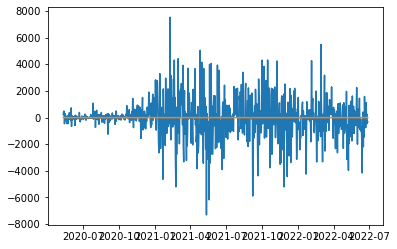

In [7]:
#differencing
plt.plot(btc.loc[halvingdates[2]:].Price.diff(1))

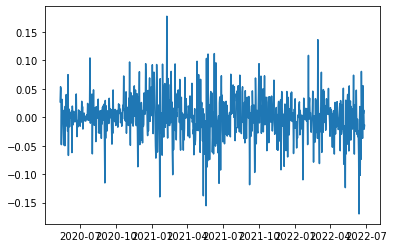

In [8]:
plt.plot(logbtc.loc[halvingdates[2]:].diff(1))

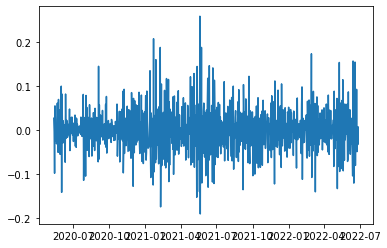

In [35]:
plt.plot(logbtc.loc[halvingdates[2]:].diff(1).dropna().diff(1))

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [11]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [12]:
adf_test(btc.loc[halvingdates[2]:].Price.diff(1).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -28.933244
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    776.000000
Critical Value (1%)             -3.438805
Critical Value (5%)             -2.865272
Critical Value (10%)            -2.568757
dtype: float64


In [13]:
kpss_test(btc.loc[halvingdates[2]:].Price.diff(1).dropna())

Results of KPSS Test:
Test Statistic           0.367835
p-value                  0.091019
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [14]:
adf_test(logbtc.loc[halvingdates[2]:].Price.diff(1).dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -29.214658
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    776.000000
Critical Value (1%)             -3.438805
Critical Value (5%)             -2.865272
Critical Value (10%)            -2.568757
dtype: float64


In [15]:
kpss_test(logbtc.loc[halvingdates[2]:].Price.diff(1).dropna())

Results of KPSS Test:
Test Statistic           0.732214
p-value                  0.010617
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [32]:
adf_test(logbtc.loc[halvingdates[2]:].Price.diff(1).dropna().diff(1).dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.033152e+01
p-value                        2.834288e-18
#Lags Used                     1.800000e+01
Number of Observations Used    7.570000e+02
Critical Value (1%)           -3.439018e+00
Critical Value (5%)           -2.865366e+00
Critical Value (10%)          -2.568807e+00
dtype: float64


In [33]:
kpss_test(logbtc.loc[halvingdates[2]:].Price.diff(1).dropna().diff(1).dropna())

Results of KPSS Test:
Test Statistic            0.046486
p-value                   0.100000
Lags Used                72.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/andy/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


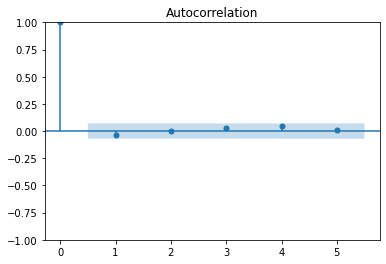

In [16]:
sm.graphics.tsa.plot_acf(btc.loc[halvingdates[2]:].Price.diff(1).dropna(), lags=5)
plt.show()

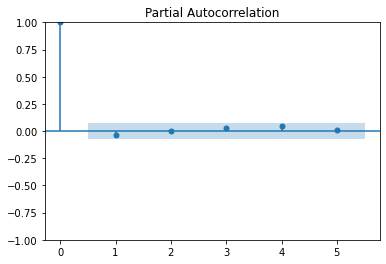

In [17]:
sm.graphics.tsa.plot_pacf(btc.loc[halvingdates[2]:].Price.diff(1).dropna(), lags=5, method='ywm')
plt.show()

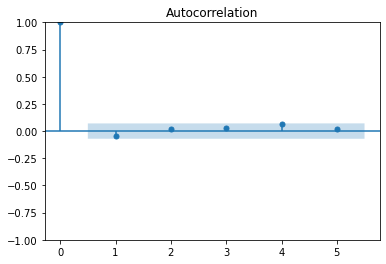

In [18]:
sm.graphics.tsa.plot_acf(logbtc.loc[halvingdates[2]:].Price.diff(1).dropna(), lags=5)
plt.show()

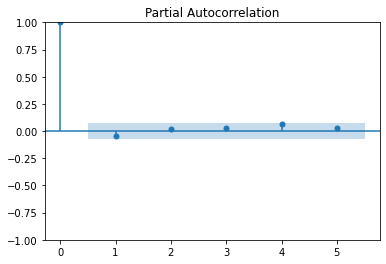

In [19]:
sm.graphics.tsa.plot_pacf(logbtc.loc[halvingdates[2]:].Price.diff(1).dropna(), lags=5, method='ywm')
plt.show()

# Auto ARIMA

In [22]:
from pmdarima.arima import auto_arima

In [23]:
auto_arima(btc.loc[halvingdates[2]:].Price)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [24]:
auto_arima(btc.loc[halvingdates[2]:].Price.diff(1).dropna())

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [25]:
auto_arima(logbtc.loc[halvingdates[2]:].Price)

ARIMA(order=(1, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
auto_arima(logbtc.loc[halvingdates[2]:].Price.diff(1).dropna())

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [28]:
auto_arima(logbtc.loc[halvingdates[1]:halvingdates[2]].Price)

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

In [29]:
auto_arima(logbtc.loc[halvingdates[0]:halvingdates[1]].Price)

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [30]:
auto_arima(logbtc.loc[halvingdates[0]:halvingdates[2]].Price)

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True)

In [31]:
auto_arima(logbtc.loc[halvingdates[1]:].Price)

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

# ARIMA Forecasting

This is a rolling one day forecast.

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [47]:
X = logbtc.loc[halvingdates[2]:].Price
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

In [61]:
# walk-forward validation
predictions = []
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit();
    output = model_fit.forecast();
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=10.461193, expected=10.498760
predicted=10.490883, expected=10.510186
predicted=10.504312, expected=10.517364
predicted=10.512086, expected=10.513291
predicted=10.508807, expected=10.523131
predicted=10.518065, expected=10.538637
predicted=10.533685, expected=10.549852
predicted=10.545522, expected=10.543200
predicted=10.539956, expected=10.558403
predicted=10.554146, expected=10.563871
predicted=10.560421, expected=10.515728
predicted=10.514809, expected=10.526448
predicted=10.522011, expected=10.635100
predicted=10.626937, expected=10.631353
predicted=10.629981, expected=10.654743
predicted=10.652132, expected=10.688186
predicted=10.685546, expected=10.692835
predicted=10.691940, expected=10.700767
predicted=10.699802, expected=10.681022
predicted=10.681388, expected=10.654654
predicted=10.655044, expected=10.650322
predicted=10.649396, expected=10.646902
predicted=10.645884, expected=10.658466
predicted=10.656775, expected=10.704264
predicted=10.701321, expected=10.689319


/Users/andy/miniforge3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=10.689602, expected=10.610385
predicted=10.613135, expected=10.596662
predicted=10.595621, expected=10.598915
predicted=10.597046, expected=10.554666
predicted=10.554695, expected=10.519178
predicted=10.518125, expected=10.551878
predicted=10.547714, expected=10.524752
predicted=10.523477, expected=10.554254
predicted=10.550334, expected=10.576702
predicted=10.573599, expected=10.574300
predicted=10.572566, expected=10.537153
predicted=10.536813, expected=10.673346
predicted=10.664856, expected=10.701474
predicted=10.699884, expected=10.689984
predicted=10.690388, expected=10.656412
predicted=10.657609, expected=10.574995
predicted=10.577517, expected=10.581440
predicted=10.579660, expected=10.555920
predicted=10.555452, expected=10.546020
predicted=10.544653, expected=10.564778
predicted=10.562230, expected=10.643757
predicted=10.639439, expected=10.581960
predicted=10.583959, expected=10.564401
predicted=10.563812, expected=10.566570
predicted=10.565000, expected=10.539890


/Users/andy/miniforge3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=10.344052, expected=10.315683
predicted=10.314989, expected=10.312241
predicted=10.309728, expected=10.277954
predicted=10.277118, expected=10.254299
predicted=10.252488, expected=10.188941
predicted=10.188955, expected=10.019001
predicted=10.021731, expected=10.005967
predicted=9.999491, expected=10.024771
predicted=10.017106, expected=9.922682
predicted=9.919747, expected=9.925523
predicted=9.916635, expected=9.851536
predicted=9.845434, expected=9.931988
predicted=9.918530, expected=9.931749
predicted=9.923839, expected=9.938922
predicted=9.930893, expected=9.901826
predicted=9.895933, expected=9.957109
predicted=9.946620, expected=9.963072
predicted=9.956098, expected=9.975385
predicted=9.968369, expected=9.954395
predicted=9.949215, expected=9.940012


NameError: name 'mean_squared_error' is not defined

In [69]:
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
truermse = np.sqrt(mean_squared_error(np.exp(test)-1, np.exp(predictions)-1))
print('Test RMSE: %.3f' % truermse)


Test RMSE: 0.039
Test RMSE: 1337.065


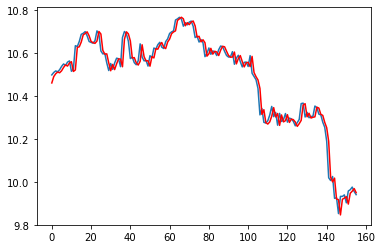

In [64]:
#plot the predictions of the log values
plt.plot(test.values)
plt.plot(np.array(predictions), color='red')
plt.show()

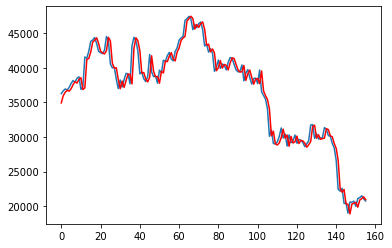

In [67]:
#plot the predictions of actual values
plt.plot(np.exp(test.values)-1)
plt.plot(np.exp(np.array(predictions))-1, color='red')
plt.show()

In [71]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [74]:
mape(test, predictions)


0.002669485795587847

In [75]:
mape(np.exp(test.values)-1, np.exp(np.array(predictions))-1)


0.02797183843392298